### EDA

In [40]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/Air-BnB-2-BW/data-science/master/airbnb_bw.csv'

In [ ]:
import pandas as pd

df = pd.read_csv(DATA_PATH, index_col=0)

print(df.shape)

df

(972, 13)


,Zipcode,Square Feet,Bedrooms,Bathrooms,Review Scores Rating,Accommodates,Cleaning Fee,Free Parking,Wireless Internet,Cable TV,Prop_encoded,cancel_encoded,Price
0,78704.0,500.0,1.0,1.0,97.0,2.0,25.0,1.0,1.0,1.0,1.0,2.0,85.0
22,78746.0,2800.0,4.0,2.5,99.0,8.0,300.0,1.0,1.0,1.0,1.0,2.0,499.0
108,78741.0,1600.0,1.0,1.5,100.0,4.0,100.0,1.0,1.0,1.0,1.0,0.0,450.0
109,78722.0,900.0,1.0,1.0,80.0,2.0,50.0,1.0,1.0,0.0,1.0,2.0,150.0
122,78702.0,2700.0,3.0,2.0,97.0,8.0,100.0,0.0,1.0,1.0,1.0,2.0,275.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120258,78704.0,1810.0,3.0,2.0,93.0,6.0,180.0,1.0,1.0,1.0,1.0,0.0,499.0
120281,78704.0,2100.0,4.0,3.0,99.0,8.0,150.0,1.0,1.0,1.0,1.0,2.0,800.0
120466,78701.0,1094.0,2.0,1.5,100.0,6.0,100.0,0.0,1.0,1.0,1.0,2.0,899.0
120500,78722.0,600.0,1.0,1.0,98.0,2.0,69.0,1.0,1.0,0.0,1.0,2.0,79.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 972 entries, 0 to 120781
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Zipcode               972 non-null    float64
 1   Square Feet           972 non-null    float64
 2   Bedrooms              972 non-null    float64
 3   Bathrooms             972 non-null    float64
 4   Review Scores Rating  972 non-null    float64
 5   Accommodates          972 non-null    float64
 6   Cleaning Fee          972 non-null    float64
 7   Free Parking          972 non-null    float64
 8   Wireless Internet     972 non-null    float64
 9   Cable TV              972 non-null    float64
 10  Prop_encoded          972 non-null    float64
 11  cancel_encoded        972 non-null    float64
 12  Price                 972 non-null    float64
dtypes: float64(13)
memory usage: 106.3 KB


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


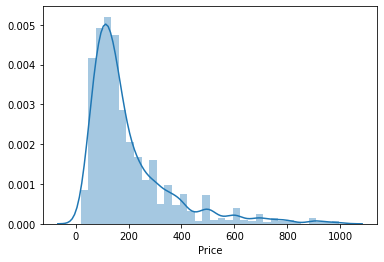

In [ ]:
# is the target symmetric - it is skewed right
%matplotlib inline
import seaborn as sns
sns.distplot(df['Price']);

In [21]:
pd.options.display.float_format = '{:,.0f}'.format
df['Price'].describe()

count   972
mean    200
std     159
min      20
25%      99
50%     148
75%     245
max     995
Name: Price, dtype: float64

### Mean Baseline

In [22]:
guess = df['Price'].mean()

In [23]:
guess

199.92078189300412

In [24]:
errors = guess - df['Price']

In [25]:
errors

0      115
1     -299
2     -250
3       50
4      -75
      ... 
967   -299
968   -600
969   -699
970    121
971    -60
Name: Price, Length: 972, dtype: float64

In [26]:
mean_absolute_error = errors.abs().mean()

In [27]:
print(f'If we just guessed every Airbnb cost ${guess:,.0f},')
print(f'we would be off by ${mean_absolute_error:,.0f} on average.')

If we just guessed every Airbnb cost $200,
we would be off by $113 on average.


### Set features / Target

In [32]:
from sklearn.model_selection import train_test_split
train, test= train_test_split(df, test_size=0.20)

# Arrange data into X features matrix and y target vector
features = ['Zipcode', 'Square Feet', 'Bedrooms', 'Bathrooms', 'Review Scores Rating', 'Accommodates', 'Cleaning Fee', 'Free Parking', 'Wireless Internet', 'Cable TV', 'Prop_encoded', 'cancel_encoded']
target = 'Price'
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [33]:
list(X_train)

['Zipcode',
 'Square Feet',
 'Bedrooms',
 'Bathrooms',
 'Review Scores Rating',
 'Accommodates',
 'Cleaning Fee',
 'Free Parking',
 'Wireless Internet',
 'Cable TV',
 'Prop_encoded',
 'cancel_encoded']

In [37]:
# Predict the price of the Tesla Model S
Zipcode = 78704
Square_Feet = 2000
Bedrooms = 3
Bathrooms = 2
Review_Scores_Rating = 4.8
Accommodates = 3
Cleaning_Fee = 200
Free_Parking = 1
Wireless_Internet = 1
Cable_TV = 1
Prop_encoded = 1
cancel_encoded = 2

In [38]:
Price = model.predict([[Zipcode, Square_Feet, Bedrooms, Bathrooms, Review_Scores_Rating, Accommodates, Cleaning_Fee, Free_Parking, Wireless_Internet, Cable_TV, Prop_encoded, cancel_encoded]])

In [39]:
print("This Airbnb should be priced at :$",Price)

This Airbnb should be priced at :$ [212.30964052]


### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred_train = model.predict(X_train)
print("MAE(Train):$",mean_absolute_error(y_train, y_pred_train))

MAE(Train):$ 65.94651085150686


In [ ]:
r2_base = r2_score(y_train, y_pred_train)
print('R^2 scores (Train):',r2_base)

R^2 scores (Train): 0.5910608128990152


### Random Forest

In [29]:
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_distributions = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42), 
    param_distributions=param_distributions, 
    n_iter=50, 
    cv=5, 
    scoring='neg_mean_absolute_error', 
    verbose=50, 
    return_train_score=True, 
    n_jobs=-1, 
    random_state=42)
search.fit(X_train, y_train);

In [ ]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)
model = search.best_estimator_

In [ ]:
row = X_train.iloc[[1]]
row

In [ ]:
#What does the model predict for this Temperature
model.predict(row)